# This is the Coursera Capstone for IBM Professional Certification 

# 1.  Web Scrapping and Data Preparation for a Dataset of Top Secondary Schools in Melbourne. 
### 2nd Week Final Code.
    Import required libraries

In [125]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# we import the libraries for request and BeautifulSoup
from urllib.request import urlopen
from bs4 import BeautifulSoup


### Define the url variable to access to the Top Secondary Schools in Melbourne Australia.

In [126]:
url = 'https://bettereducation.com.au/school/secondary/vic/melbourne_top_secondary_schools.aspx'
#html = urlopen(url)

### Let's use the pandas' read_html method to get the table from the url given. 

In [127]:
dflst = pd.read_html(url,header =0)
df = dflst[0]
dflst[0].head()

,School,Postcode,State Overall Score,English,Maths,Total Enrolments,Trend / Compare,Sector
0,Mac.Robertson Girls' High School,3004,100,NaN,NaN,954,Trend / Compare,Government
1,Melbourne High School,3141,100,NaN,NaN,1357,Trend / Compare,Government
2,"Nossal High School,Berwick,VIC,3806",3806,100,NaN,NaN,832,Trend / Compare,Government
3,"Suzanne Cory High School,Werribee,VIC,3030",3030,100,NaN,NaN,871,Trend / Compare,Government
4,"Presbyterian Ladies' College,Burwood,VIC,3125",3125,100,NaN,NaN,1407,Trend / Compare,Non-government


### Let's start to clean the dataframe
Drop the followings columns: English, Maths, Total Enrolments and Trend/Compare

In [128]:
#df = 
melb_schl = df[['School', 'Postcode', 'State Overall Score', 'Total Enrolments','Sector']]
gov_schools = melb_schl[melb_schl['Sector'] == 'Government']
nongov_schools = melb_schl[melb_schl['Sector'] == 'Non-government']
gov_schools.head()
nongov_schools.head()
print(nongov_schools.shape)
print(gov_schools.shape)
print(melb_schl.shape)

(93, 5)
(37, 5)
(130, 5)


In [129]:
melb_schl.head()

,School,Postcode,State Overall Score,Total Enrolments,Sector
0,Mac.Robertson Girls' High School,3004,100,954,Government
1,Melbourne High School,3141,100,1357,Government
2,"Nossal High School,Berwick,VIC,3806",3806,100,832,Government
3,"Suzanne Cory High School,Werribee,VIC,3030",3030,100,871,Government
4,"Presbyterian Ladies' College,Burwood,VIC,3125",3125,100,1407,Non-government


### Next we import the dataset with the Postcodes of the Victoria state in Australia from https://en.wikipedia.org/wiki/List_of_Melbourne_suburbs. Then stored in Google Sheets. This information was geocoded using Google Sheets as provides more stable requests over large amount of address. This Dataset will be available in Github as well. 

In [130]:
vic_geo = pd.read_csv('Geocode VIC - Sheet1.csv')
vic_geo.head()

,Suburb,Postcode,State,Address,Lat,Lng,Local government area
0,Melbourne CBD,3000,VIC,"Melbourne CBD,3000,VIC",-37.815207,144.963937,City of Melbourne
1,East Melbourne,3002,VIC,"East Melbourne,3002,VIC",-37.816144,144.980459,City of Melbourne
2,West Melbourne,3003,VIC,"West Melbourne,3003,VIC",-37.811450,144.925397,City of Melbourne
3,Melbourne CBD(St Kilda Roadarea),3004,VIC,"Melbourne CBD(St Kilda Roadarea),3004,VIC",-37.838947,144.975959,"City of Melbourne(east side to High Street, Pr..."
4,South Wharf,3006,VIC,"South Wharf,3006,VIC",-37.825000,144.952000,City of Melbourne;City of Port Phillip


In [131]:
vic_geo.shape

(549, 7)

In [132]:
melb_schl[melb_schl['Sector']=="Government"].count()

School                 37
Postcode               37
State Overall Score    37
Total Enrolments       37
Sector                 37
dtype: int64

### Adding Suburb + VIC(state)+postcode the field School

In [133]:
#melb_schl[melb_schl['Sector']=="Government"]

for idx, school, postcode in zip(melb_schl[melb_schl['Sector']=="Government"].index,melb_schl[melb_schl['Sector']=="Government"].School, melb_schl[melb_schl['Sector']=="Government"].Postcode):
    if school == ("Nossal High School,Berwick,VIC,3806"):
        print("School already with Suburb and postcode")
    elif (school == "Suzanne Cory High School,Werribee,VIC,3030"):
        print("School already with Suburb and postcode")
    elif (school == "Auburn High School,Hawthorn East,VIC,3123"):
        print("School already with Suburb and postcode")
    elif school == "Albert Park College,Albert Park,VIC,3206":
        print("School already with Suburb and postcode")
    elif school == "Alamanda K-9 College,Point Cook,VIC,3030":
        print("School already with Suburb and postcode")
    else:
        i = vic_geo[vic_geo['Postcode']== postcode].index.values[0]
        temp_sub = vic_geo.loc[i,'Suburb']
        melb_schl.at[idx,'School'] = school+','+temp_sub+','+'VIC'+','+str(postcode)
        print("New School string is: {}".format(melb_schl.loc[idx,'School']))

New School string is: Mac.Robertson Girls' High School,Melbourne CBD(St Kilda Roadarea),VIC,3004
New School string is: Melbourne High School,South Yarra,VIC,3141
School already with Suburb and postcode
School already with Suburb and postcode
New School string is: Box Hill High School,Box Hill,VIC,3128
New School string is: University High School,Parkville,VIC,3052
New School string is: Glen Waverley Secondary College,Glen Waverley,VIC,3150
New School string is: Balwyn High School,Balwyn North,VIC,3104
New School string is: Victorian College Of The Arts Secondary School,South Wharf,VIC,3006
New School string is: East Doncaster Secondary College,Doncaster East,VIC,3109
New School string is: Melbourne Girls' College,Burnley,VIC,3121
New School string is: Mckinnon Secondary College,Bentleigh,VIC,3204
New School string is: Vermont Secondary College,Vermont,VIC,3133
New School string is: Mount Waverley Secondary College,Mount Waverley,VIC,3149
New School string is: Canterbury Girls Secondary

In [134]:
# Validate the results
print(melb_schl['School'])

0      Mac.Robertson Girls' High School,Melbourne CBD...
1             Melbourne High School,South Yarra,VIC,3141
2                    Nossal High School,Berwick,VIC,3806
3             Suzanne Cory High School,Werribee,VIC,3030
4          Presbyterian Ladies' College,Burwood,VIC,3125
5                  Fintona Girls' School,Balwyn,VIC,3103
6                                     Haileybury College
7            Huntingtower School,Mount Waverley,VIC,3149
8       Korowa Anglican Girls' School,Glen Iris,VIC,3146
9          Camberwell Grammar School,Canterbury,VIC,3126
10           St Leonard's College,Brighton East,VIC,3187
11                              Melbourne Grammar School
12     Camberwell Girls Grammar School,Canterbury,VIC...
13                   Trinity Grammar School,Kew,VIC,3101
14                    St Kevin's College,Toorak,VIC,3142
15                      Scotch College,Hawthorn,VIC,3122
16             Lauriston Girls' School,Armadale,VIC,3143
17     Penleigh & Essendon Gram

## There is some missing data in school columns, that is related to the Suburbs of the dataframe.

### This will be updated manually as there are suburbs in the School column that share same postcode or wrong postcode.

In [135]:
# There is some missing data in school column, that is related to the Suburb in 7 rows.
# Haileybury College, VIC 3173
i = melb_schl[melb_schl['School']== 'Haileybury College'].index.values[0]
temp = melb_schl.loc[i,'School']
melb_schl.at[i,'School'] = temp+','+'Keysborough'

#Suzanne Cory High School,Werribee,VIC,3030
#i = melb_schl[melb_schl['School']== "Suzanne Cory High School,Werribee,VIC,3030,Cocoroc,VIC,3030"].index.values[0]
#melb_schl.at[i,'School'] = "Suzanne Cory High School,Werribee,VIC,3030"

#Nossal High School,Berwick,VIC,3806,Berwick,VIC,3806
#i = melb_schl[melb_schl['School']== "Nossal High School,Berwick,VIC,3806,Berwick,VIC,3806"].index.values[0]
#melb_schl.at[i,'School'] = "Nossal High School,Berwick,VIC,3806"

#Auburn High School,Hawthorn East,VIC,3123,Hawthorn East,VIC,3123
#i = melb_schl[melb_schl['School']== "Auburn High School,Hawthorn East,VIC,3123,Hawthorn East,VIC,3123"].index.values[0]
#melb_schl.at[i,'School'] = "Auburn High School,Hawthorn East,VIC,3123"

#Albert Park College,Albert Park,VIC,3206,Albert Park,VIC,3206
#i = melb_schl[melb_schl['School']== "Albert Park College,Albert Park,VIC,3206,Albert Park,VIC,3206"].index.values[0]
#melb_schl.at[i,'School'] = "Albert Park College,Albert Park,VIC,3206"

#Melbourne Girls' College Richmond 3121
i = melb_schl[melb_schl['School']== "Melbourne Girls' College,Burnley,VIC,3121"].index.values[0]
melb_schl.at[55,'School']=  "Melbourne Girls' College,Richmond,VIC,3121"

#Victorian College Of The Arts Secondary School, Southbank, 3006
i = melb_schl[melb_schl['School']== "Victorian College Of The Arts Secondary School,South Wharf,VIC,3006"].index.values[0]
melb_schl.at[i,'School']= "Victorian College Of The Arts Secondary School,Southbank,VIC,3006"


# Melbourne Grammar School 3004

i = melb_schl[melb_schl['School']=='Melbourne Grammar School'].index.values[0]
temp = melb_schl.loc[i,'School']
melb_schl.at[i,'School']= temp+','+"Melbourne CBD(St Kilda Roadarea)"

#School: Wesley College,Melbourne,VIC,3004
i = melb_schl[melb_schl['School']=='Wesley College,Melbourne,VIC,3004'].index.values[0]
temp = melb_schl.loc[i,'School']
melb_schl.at[i,'School']= temp+','+"Melbourne CBD(St Kilda Roadarea)"



#School: Mckinnon Secondary College at Suburb: McKinnon, postcode 3204
i = melb_schl[melb_schl['School']=='Mckinnon Secondary College,Bentleigh,VIC,3204'].index.values[0]
melb_schl.at[i,'School']= "McKinnon Secondary College,McKinnon,VIC,3204"

#School: Viewbank College,Viewbank,VIC,3084
i = melb_schl[melb_schl['School']=='Viewbank College,Eaglemont,VIC,3084'].index.values[0]
melb_schl.at[i,'School']= "Viewbank College,Viewbank,VIC,3084"


#New School string is: Princes Hill Secondary College,Carlton North,VIC,3054
i = melb_schl[melb_schl['School']=='Princes Hill Secondary College,Carlton North,VIC,3054'].index.values[0]
melb_schl.at[i,'School']= "Princes Hill Secondary College,Princes Hill,VIC,3054" 
    



#117 Virtual School Victoria. As it is distance education has no physical location
#i = melb_schl[melb_schl['School']== "Virtual School Victoria"].index.values[0]
#melb_schl.drop(i, inplace = True)

melb_schl.reset_index(inplace = True,drop =True)
melb_schl

,School,Postcode,State Overall Score,Total Enrolments,Sector
0,"Mac.Robertson Girls' High School,Melbourne CBD...",3004,100,954,Government
1,"Melbourne High School,South Yarra,VIC,3141",3141,100,1357,Government
2,"Nossal High School,Berwick,VIC,3806",3806,100,832,Government
3,"Suzanne Cory High School,Werribee,VIC,3030",3030,100,871,Government
4,"Presbyterian Ladies' College,Burwood,VIC,3125",3125,100,1407,Non-government
5,"Fintona Girls' School,Balwyn,VIC,3103",3103,100,450,Non-government
6,"Haileybury College,Keysborough",3173,99,3927,Non-government
7,"Huntingtower School,Mount Waverley,VIC,3149",3149,99,697,Non-government
8,"Korowa Anglican Girls' School,Glen Iris,VIC,3146",3146,99,670,Non-government
9,"Camberwell Grammar School,Canterbury,VIC,3126",3126,99,1296,Non-government


## Save dataframe as csv file to storage and then dowloaded

### In the Top_melb_schools.csv file there is address information (Place/venue, suburb, state code(VIC) and postcode) to geocode and get the Lat/long coordinated per school.
### As Google sheets uses an addons to geocodes cells it is more realiable in terms of large addresses information to use it than geopy package that we have been using previously.  Later on, the file geo_top_melb_schools.csv it is imported in the below cell.

### In the next cell we import the dataset with the School information and the Lat/Lng coordinates that comes from the previous step where it was already geocoded.

In [136]:
geo_schl = pd.read_csv('geo_top_melb_schools.csv')
geo_schl.head()

,School,Lat,Lng
0,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831
1,"Melbourne High School,South Yarra,VIC,3141",-37.835388,144.995677
2,"Nossal High School,Berwick,VIC,3806",-38.039219,145.336030
3,"Suzanne Cory High School,Werribee,VIC,3030",-37.893567,144.700048
4,"Presbyterian Ladies' College,Burwood,VIC,3125",-37.848946,145.107125


## Merge of the Lat/Lng dataframe with the Schools dataframe

In [137]:
#schl_vic 
schl_vic = pd.merge(melb_schl,geo_schl)
schl_vic.head(10)

,School,Postcode,State Overall Score,Total Enrolments,Sector,Lat,Lng
0,"Mac.Robertson Girls' High School,Melbourne CBD...",3004,100,954,Government,-37.836729,144.971831
1,"Melbourne High School,South Yarra,VIC,3141",3141,100,1357,Government,-37.835388,144.995677
2,"Nossal High School,Berwick,VIC,3806",3806,100,832,Government,-38.039219,145.336030
3,"Suzanne Cory High School,Werribee,VIC,3030",3030,100,871,Government,-37.893567,144.700048
4,"Presbyterian Ladies' College,Burwood,VIC,3125",3125,100,1407,Non-government,-37.848946,145.107125
5,"Fintona Girls' School,Balwyn,VIC,3103",3103,100,450,Non-government,-37.814764,145.080433
6,"Haileybury College,Keysborough",3173,99,3927,Non-government,-37.992809,145.144701
7,"Huntingtower School,Mount Waverley,VIC,3149",3149,99,697,Non-government,-37.876487,145.136121
8,"Korowa Anglican Girls' School,Glen Iris,VIC,3146",3146,99,670,Non-government,-37.860997,145.054004
9,"Camberwell Grammar School,Canterbury,VIC,3126",3126,99,1296,Non-government,-37.816624,145.066725


In [138]:
schl_vic.shape

(129, 7)

In [139]:
schl_vic[schl_vic['Sector']=='Government'].School.count()


37

In [140]:
schl_vic[schl_vic['Sector']=='Non-government'].School.count()

92

For loop over the gov_schools Dataframe to select the Suburb, postcode and  Lat/Long coordinates from vic_geo Dataframe.

### For loop over the latlon dataframe
We get the postcode from latlon and search for that postcode in the df dataframe, then the index of df is obtained. 
With the index we can update df to add the latitude and longitud information from the latlon dataframe.

for idx, pcode,lat,lon in zip(latlon.index, latlon['Postcode'], latlon['Latitude'], latlon['Longitude']):
    # Getting the index values of df that match the postcod of latlon dataframe. 
    i = df[df['Postcode'] == pcode].index.values
    #print(i.shape[0])
    if i.shape[0] != 0:
        df.at[i,'Latitude'] = lat
        df.at[i,'Longitude'] =lon
        

df.head()

# 2. Explore and Cluster Secondary Schools in Melbourne

Let's install geopy and folium

In [141]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!pip install folium==0.5.0
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Use geopy library to get the latitude and longitude values of Melbourne City.

In [142]:
address = 'Melbourne, VIC,3000'

geolocator = Nominatim(user_agent="melbourne_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Melbourne City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Melbourne City are -37.8042409, 144.941123149578.


#### Create map of Melbourne using latitude and longitude values

In [143]:
# create map of Melbourne using latitude and longitude values
map_melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, school, score, enrol, sector in zip(schl_vic['Lat'], schl_vic['Lng'], schl_vic['School'], schl_vic['State Overall Score'], schl_vic['Total Enrolments'], schl_vic['Sector']):
    label = 'School: {}, State Overall Score {}, Total Enrolments {}, Sector: {}'.format(school, score, enrol,sector)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
    
map_melbourne

In [144]:
CLIENT_ID = 'I1MJ32QYFTODVVPW54MTDO4KK44FYJIAJKV0Z1ULVUVSI1G4' # your Foursquare ID
CLIENT_SECRET = 'EHLA5VNBKTF4AZL4TSI5YU441UCMO1IMN4YHUAPRNQSNMBUY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I1MJ32QYFTODVVPW54MTDO4KK44FYJIAJKV0Z1ULVUVSI1G4
CLIENT_SECRET:EHLA5VNBKTF4AZL4TSI5YU441UCMO1IMN4YHUAPRNQSNMBUY


In [145]:
schl_vic.loc[schl_vic.index.values[3],'School']

'Suzanne Cory High School,Werribee,VIC,3030'

In [146]:
schl_latitude = schl_vic.loc[schl_vic.index.values[0], 'Lat'] # School latitude value
schl_longitude = schl_vic.loc[schl_vic.index.values[0], 'Lng'] # School longitude value

schl_name = schl_vic.loc[schl_vic.index.values[0], 'School'] # School name

print('Latitude and longitude values of {} are {}, {}.'.format(schl_name, 
                                                               schl_latitude, 
                                                               schl_longitude))

Latitude and longitude values of Mac.Robertson Girls' High School,Melbourne CBD(St Kilda Roadarea),VIC,3004 are -37.8367287, 144.97183090000001.


### Now, let's get the top 50 venues that are in Schools within a radius of 1000 meters.
First, let's create the GET request URL. Name your URL url.

In [147]:
# type your answer here
LIMIT =100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    schl_latitude, 
    schl_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=I1MJ32QYFTODVVPW54MTDO4KK44FYJIAJKV0Z1ULVUVSI1G4&client_secret=EHLA5VNBKTF4AZL4TSI5YU441UCMO1IMN4YHUAPRNQSNMBUY&v=20180605&ll=-37.8367287,144.97183090000001&radius=1000&limit=100'

In [148]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d7efa34b9961d002bd6995e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 107,
  'suggestedBounds': {'ne': {'lat': -37.82772869099999,
    'lng': 144.9832054729414},
   'sw': {'lat': -37.845728709000014, 'lng': 144.96045632705864}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '576ca21c498eecbf1b01fab5',
       'name': 'Crux & Co',
       'location': {'address': 'G01, 35 Albert Road',
        'lat': -37.834504818375116,
        'lng': 144.971561652877,
        'labeledLatLngs': [{'label': 'display',
          'lat': -37.

### Explore Schools in Melbourne
Let's use the function used in the previuos lab to get the near by venues for all the Top Secondary Schools in Melbourne

In [149]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['School', 
                  'School Latitude', 
                  'School Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [150]:
## To simplify the code

schl_vic.reset_index(drop = True)
schl_venues = getNearbyVenues(names=schl_vic['School'],
                                   latitudes=schl_vic['Lat'],
                                   longitudes=schl_vic['Lng']
                                  )

Mac.Robertson Girls' High School,Melbourne CBD(St Kilda Roadarea),VIC,3004
Melbourne High School,South Yarra,VIC,3141
Nossal High School,Berwick,VIC,3806
Suzanne Cory High School,Werribee,VIC,3030
Presbyterian Ladies' College,Burwood,VIC,3125
Fintona Girls' School,Balwyn,VIC,3103
Haileybury College,Keysborough
Huntingtower School,Mount Waverley,VIC,3149
Korowa Anglican Girls' School,Glen Iris,VIC,3146
Camberwell Grammar School,Canterbury,VIC,3126
St Leonard's College,Brighton East,VIC,3187
Melbourne Grammar School,Melbourne CBD(St Kilda Roadarea)
Camberwell Girls Grammar School,Canterbury,VIC,3126
Trinity Grammar School,Kew,VIC,3101
St Kevin's College,Toorak,VIC,3142
Scotch College,Hawthorn,VIC,3122
Lauriston Girls' School,Armadale,VIC,3143
Penleigh & Essendon Grammar School,Keilor East,VIC,3033
Kilvington Grammar School,Ormond,VIC,3204
Ruyton Girls' School,Kew,VIC,3101
St Margaret's School,Berwick,VIC,3806
Box Hill High School,Box Hill,VIC,3128
Lighthouse Christian College,Cranbourne,

Let's explore the new Dataframe schl_venues

In [151]:
print(schl_venues.shape)
schl_venues.head()

(3611, 7)


,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831,Crux & Co,-37.834505,144.971562,Café
1,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831,The Kettle Black,-37.833992,144.971451,Café
2,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831,Slater St. Bench,-37.839004,144.976725,Café
3,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831,Kebabs R' Yummy,-37.831966,144.969831,Middle Eastern Restaurant
4,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831,Tempura Hajime,-37.832900,144.968930,Japanese Restaurant


In [152]:
# Let's count the venues around the schools.
schl_venues.groupby(['School']).count()

,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
School,,,,,,
"Academy of Mary Immaculate,Fitzroy,VIC,3065",100,100,100,100,100,100
"Adass Israel School,Elsternwick,VIC,3185",50,50,50,50,50,50
"Alamanda K-9 College,Point Cook,VIC,3030",8,8,8,8,8,8
"Albert Park College,Albert Park,VIC,3206",88,88,88,88,88,88
"Alphington Grammar School,Alphington,VIC,3078",11,11,11,11,11,11
"Auburn High School,Hawthorn East,VIC,3123",29,29,29,29,29,29
"Avila College,Mount Waverley,VIC,3149",18,18,18,18,18,18
"Bacchus Marsh Grammar,Bacchus Marsh,VIC,3340",1,1,1,1,1,1
"Balcombe Grammar School,Mount Martha,VIC,3934",3,3,3,3,3,3


Let's find out how many unique categories can be curated from all the returned venues

In [153]:
print('There are {} uniques categories.'.format(len(schl_venues['Venue Category'].unique())))
schl_venues.head()

There are 276 uniques categories.


,School,School Latitude,School Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831,Crux & Co,-37.834505,144.971562,Café
1,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831,The Kettle Black,-37.833992,144.971451,Café
2,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831,Slater St. Bench,-37.839004,144.976725,Café
3,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831,Kebabs R' Yummy,-37.831966,144.969831,Middle Eastern Restaurant
4,"Mac.Robertson Girls' High School,Melbourne CBD...",-37.836729,144.971831,Tempura Hajime,-37.832900,144.968930,Japanese Restaurant


## Analyze Each School's Suburb

In [154]:
# one hot encoding
schl_onehot = pd.get_dummies(schl_venues[['Venue Category']], prefix="", prefix_sep="")
schl_onehot.head()
# add neighborhood column back to dataframe
schl_onehot['School'] = schl_venues['School'] 
schl_onehot.head()


,Afghan Restaurant,African Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Car Wash,Casino,Cemetery,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Library,College Quad,College Theater,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cricket Ground,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Hockey Field,Home Service,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Office,Opera House,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Snack Place,Soccer Field,Social Club,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Track Stadium,Trade School,Trail,Train,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [155]:
# move School column to the first column
fixed_columns = [schl_onehot.columns[-1]] + list(schl_onehot.columns[:-1])
schl_onehot = schl_onehot[fixed_columns]
#toronto_onehot.rename(columns = {'Zeighborhood':'Neighborhood'},inplace = True) 

schl_onehot.head()

,Yunnan Restaurant,Afghan Restaurant,African Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Car Wash,Casino,Cemetery,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Library,College Quad,College Theater,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cricket Ground,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Hockey Field,Home Service,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Office,Opera House,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Snack Place,Soccer Field,Social Club,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Track Stadium,Trade School,Trail,Train,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [156]:
schl_onehot.School.head()

0    Mac.Robertson Girls' High School,Melbourne CBD...
1    Mac.Robertson Girls' High School,Melbourne CBD...
2    Mac.Robertson Girls' High School,Melbourne CBD...
3    Mac.Robertson Girls' High School,Melbourne CBD...
4    Mac.Robertson Girls' High School,Melbourne CBD...
Name: School, dtype: object

### Next, let's group rows by School and by taking the mean of the frequency of occurrence of each category

In [157]:
schl_grouped = schl_onehot.groupby('School').mean().reset_index()
schl_grouped.head()

,School,Yunnan Restaurant,Afghan Restaurant,African Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Bowling Green,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Car Wash,Casino,Cemetery,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Library,College Quad,College Theater,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cricket Ground,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Service,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Hockey Field,Home Service,Hostel,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Knitting Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nightclub,Noodle House,Office,Opera House,Optical Shop,Outdoor Supply Store,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Post Office,Pub,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Area,Snack Place,Soccer Field,Social Club,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stadium,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Swim School,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Track Stadium,Trade School,Trail,Train,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Water Park,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Academy of Mary Immaculate,Fitzroy,VIC,3065",0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.01,0.010000,0.0

In [158]:
schl_grouped.shape

(129, 276)

New function that sort the venues in descending order.

In [159]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each School/Suburb using schl_grouped dataframe.

In [160]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['School']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
schl_venues_sorted = pd.DataFrame(columns=columns)
schl_venues_sorted['School'] = schl_grouped['School']

for ind in np.arange(schl_grouped.shape[0]):
    schl_venues_sorted.iloc[ind, 1:] = return_most_common_venues(schl_grouped.iloc[ind, :], num_top_venues)

schl_venues_sorted.head()

,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Academy of Mary Immaculate,Fitzroy,VIC,3065",Café,Wine Bar,Bar,Ice Cream Shop,Deli / Bodega,Cocktail Bar,Pub,Coffee Shop,Bakery,Australian Restaurant
1,"Adass Israel School,Elsternwick,VIC,3185",Café,Park,Burger Joint,Sushi Restaurant,Greek Restaurant,Fast Food Restaurant,Japanese Restaurant,Portuguese Restaurant,Performing Arts Venue,Lounge
2,"Alamanda K-9 College,Point Cook,VIC,3030",Playground,Park,Brewery,Snack Place,Coffee Shop,Event Service,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
3,"Albert Park College,Albert Park,VIC,3206",Café,Italian Restaurant,Breakfast Spot,Thai Restaurant,Bakery,Asian Restaurant,Pier,Park,Deli / Bodega,Beach
4,"Alphington Grammar School,Alphington,VIC,3078",Golf Course,Train Station,Pizza Place,Convenience Store,Thai Restaurant,Park,Gym / Fitness Center,Fast Food Restaurant,Liquor Store,Event Service


## Cluster Neighborhoods
Run k-means to cluster the neighborhood into 4 clusters.

In [161]:
# set number of clusters
kclusters = 2

schl_grouped_clustering = schl_grouped.drop('School', 1)
#Inserting the The Overall State score before clustering, so in the Kmeans, the school score has pondering  values to group the schools
schl_grouped_clustering.insert(1,'Score', schl_vic['State Overall Score']/100)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(schl_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15]

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1])

new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [162]:
# add clustering labels
schl_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

schl_venues_sorted.head()

,Cluster Labels,School,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,"Academy of Mary Immaculate,Fitzroy,VIC,3065",Café,Wine Bar,Bar,Ice Cream Shop,Deli / Bodega,Cocktail Bar,Pub,Coffee Shop,Bakery,Australian Restaurant
1,1,"Adass Israel School,Elsternwick,VIC,3185",Café,Park,Burger Joint,Sushi Restaurant,Greek Restaurant,Fast Food Restaurant,Japanese Restaurant,Portuguese Restaurant,Performing Arts Venue,Lounge
2,0,"Alamanda K-9 College,Point Cook,VIC,3030",Playground,Park,Brewery,Snack Place,Coffee Shop,Event Service,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
3,1,"Albert Park College,Albert Park,VIC,3206",Café,Italian Restaurant,Breakfast Spot,Thai Restaurant,Bakery,Asian Restaurant,Pier,Park,Deli / Bodega,Beach
4,0,"Alphington Grammar School,Alphington,VIC,3078",Golf Course,Train Station,Pizza Place,Convenience Store,Thai Restaurant,Park,Gym / Fitness Center,Fast Food Restaurant,Liquor Store,Event Service


### Merging the Suburb Venues with the Schools' data

In [163]:
schl_merged = schl_vic
# merge schl_grouped with schl_vic to add latitude/longitude for each school

schl_merged = schl_merged.join(schl_venues_sorted.set_index('School'), on='School')

schl_merged.head() # check the last columns!

,School,Postcode,State Overall Score,Total Enrolments,Sector,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Mac.Robertson Girls' High School,Melbourne CBD...",3004,100,954,Government,-37.836729,144.971831,1,Café,Australian Restaurant,Pub,Hotel,Japanese Restaurant,Light Rail Station,Convenience Store,Coffee Shop,Bar,Grocery Store
1,"Melbourne High School,South Yarra,VIC,3141",3141,100,1357,Government,-37.835388,144.995677,1,Café,Italian Restaurant,Dessert Shop,Japanese Restaurant,Coffee Shop,Hotel,Bakery,Pub,Multiplex,Thai Restaurant
2,"Nossal High School,Berwick,VIC,3806",3806,100,832,Government,-38.039219,145.336030,1,Café,Tennis Court,Swim School,Dog Run,Yoga Studio,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop
3,"Suzanne Cory High School,Werribee,VIC,3030",3030,100,871,Government,-37.893567,144.700048,0,Athletics & Sports,Health & Beauty Service,Yoga Studio,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
4,"Presbyterian Ladies' College,Burwood,VIC,3125",3125,100,1407,Non-government,-37.848946,145.107125,1,Café,Gas Station,Gym,Sandwich Place,Supermarket,Chinese Restaurant,Park,Pizza Place,Coffee Shop,Yoga Studio


In [164]:
#Cleaning some NaN values in the Dataframe.
schl_merged.dropna(inplace = True)
schl_merged.head()

,School,Postcode,State Overall Score,Total Enrolments,Sector,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Mac.Robertson Girls' High School,Melbourne CBD...",3004,100,954,Government,-37.836729,144.971831,1,Café,Australian Restaurant,Pub,Hotel,Japanese Restaurant,Light Rail Station,Convenience Store,Coffee Shop,Bar,Grocery Store
1,"Melbourne High School,South Yarra,VIC,3141",3141,100,1357,Government,-37.835388,144.995677,1,Café,Italian Restaurant,Dessert Shop,Japanese Restaurant,Coffee Shop,Hotel,Bakery,Pub,Multiplex,Thai Restaurant
2,"Nossal High School,Berwick,VIC,3806",3806,100,832,Government,-38.039219,145.336030,1,Café,Tennis Court,Swim School,Dog Run,Yoga Studio,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop
3,"Suzanne Cory High School,Werribee,VIC,3030",3030,100,871,Government,-37.893567,144.700048,0,Athletics & Sports,Health & Beauty Service,Yoga Studio,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
4,"Presbyterian Ladies' College,Burwood,VIC,3125",3125,100,1407,Non-government,-37.848946,145.107125,1,Café,Gas Station,Gym,Sandwich Place,Supermarket,Chinese Restaurant,Park,Pizza Place,Coffee Shop,Yoga Studio


 schl_merged = schl_merged.astype({'Cluster Labels':'int32'})

In [165]:
#schl_merged['Cluster Labels'] = toronto_merged.astype({'Cluster Labels':'int32'})
schl_merged['Cluster Labels']

0      1
1      1
2      1
3      0
4      1
5      1
6      0
7      0
8      1
9      1
10     1
11     1
12     1
13     1
14     0
15     0
16     1
17     1
18     0
19     1
20     1
21     1
22     0
23     1
24     1
25     0
26     0
27     0
28     1
29     1
30     1
31     0
32     1
33     1
34     0
35     1
36     1
37     1
38     0
39     1
40     0
41     1
42     1
43     0
44     1
45     1
46     1
47     0
48     0
49     1
50     0
51     1
52     1
53     1
54     0
55     1
56     1
57     1
58     1
59     0
60     0
61     0
62     0
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     0
74     1
75     1
76     0
77     0
78     1
79     0
80     1
81     1
82     0
83     0
84     0
85     1
86     0
87     1
88     0
89     1
90     0
91     1
92     1
93     0
94     1
95     1
96     0
97     1
98     0
99     0
100    0
101    1
102    0
103    0
104    1
105    1
106    0
107    1
108    0
109    1
110    1
1

### Let's visualize the resulting clusters

In [166]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat,lon,school,score,cluster,sector in zip(schl_merged['Lat'], schl_merged['Lng'], schl_merged['School'],schl_merged['State Overall Score'],schl_merged['Cluster Labels'], schl_merged['Sector']):
    label = folium.Popup(str(school) +', Score '+str(score)+', '+str(sector) +' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine the Cluster given by the Map.

Cluster 1

In [92]:
schl_merged.loc[schl_merged['Cluster Labels'] == 0, schl_merged.columns[[1] + list(range(2, schl_merged.shape[1]))]]

,Postcode,State Overall Score,Total Enrolments,Sector,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,3030,100,871,Government,-37.893567,144.700048,0,Athletics & Sports,Health & Beauty Service,Yoga Studio,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
6,3173,99,3927,Non-government,-37.992809,145.144701,0,Golf Course,Ice Cream Shop,Athletics & Sports,Fast Food Restaurant,Paper / Office Supplies Store,Greek Restaurant,Electronics Store,Stadium,Convenience Store,Dessert Shop
7,3149,99,697,Non-government,-37.876487,145.136121,0,Pizza Place,Seafood Restaurant,College Gym,Bakery,Grocery Store,Australian Restaurant,Train Station,Fried Chicken Joint,Supermarket,Salon / Barbershop
14,3142,99,2065,Non-government,-37.836002,145.025030,0,Park,Train Station,Wine Shop,Tennis Stadium,Supermarket,History Museum,Pharmacy,Athletics & Sports,Tram Station,Farmers Market
15,3122,99,1866,Non-government,-37.834231,145.029162,0,Park,Light Rail Station,Train Station,Wine Shop,Burger Joint,Tennis Stadium,Grocery Store,History Museum,Fish & Chips Shop,Café
18,3204,99,734,Non-government,-37.899544,145.041268,0,Café,Park,Burger Joint,Grocery Store,Indian Restaurant,Coffee Shop,Food & Drink Shop,Fast Food Restaurant,Sushi Restaurant,Office
22,3977,98,944,Non-government,-38.138428,145.307271,0,Roof Deck,Home Service,Yoga Studio,Fish & Chips Shop,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
25,3150,98,1951,Government,-37.877650,145.162386,0,Chinese Restaurant,Café,Malay Restaurant,Japanese Restaurant,Hotel,Thai Restaurant,Noodle House,Supermarket,Fried Chicken Joint,Fast Food Restaurant
26,3152,98,1888,Non-government,-37.880547,145.214639,0,Convenience Store,Chinese Restaurant,Soccer Field,Road,Grocery Store,Fried Chicken Joint,Video Store,Basketball Court,Fast Food Restaurant,Farmers Market
27,3135,98,804,Non-government,-37.815755,145.256682,0,Track,Coffee Shop,Fish & Chips Shop,Shopping Mall,Grocery Store,Chinese Restaurant,Train Station,Food & Drink Shop,Dessert Shop,Electronics Store


### Let's try to get some insights of each cluster. 

In [167]:
cluster1 = schl_merged.loc[schl_merged['Cluster Labels'] == 0, schl_merged.columns[[1] + list(range(2, schl_merged.shape[1]))]]
len(cluster1['5th Most Common Venue'].unique())

35

In [168]:
cluster1.shape

(54, 17)

In [169]:
cluster1.head()

,Postcode,State Overall Score,Total Enrolments,Sector,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,3030,100,871,Government,-37.893567,144.700048,0,Athletics & Sports,Health & Beauty Service,Yoga Studio,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field
6,3173,99,3927,Non-government,-37.992809,145.144701,0,Golf Course,Ice Cream Shop,Athletics & Sports,Fast Food Restaurant,Paper / Office Supplies Store,Greek Restaurant,Electronics Store,Stadium,Convenience Store,Dessert Shop
7,3149,99,697,Non-government,-37.876487,145.136121,0,Pizza Place,Seafood Restaurant,College Gym,Bakery,Grocery Store,Australian Restaurant,Train Station,Fried Chicken Joint,Supermarket,Salon / Barbershop
14,3142,99,2065,Non-government,-37.836002,145.025030,0,Park,Train Station,Wine Shop,Tennis Stadium,Supermarket,History Museum,Pharmacy,Athletics & Sports,Tram Station,Farmers Market
15,3122,99,1866,Non-government,-37.834231,145.029162,0,Park,Light Rail Station,Train Station,Wine Shop,Burger Joint,Tennis Stadium,Grocery Store,History Museum,Fish & Chips Shop,Café


In [177]:
cl1_ven1 = cluster1['1st Most Common Venue'].value_counts()
cl1_ven1.head()

Fast Food Restaurant    7
Park                    7
Golf Course             4
Chinese Restaurant      3
Pizza Place             3
Name: 1st Most Common Venue, dtype: int64

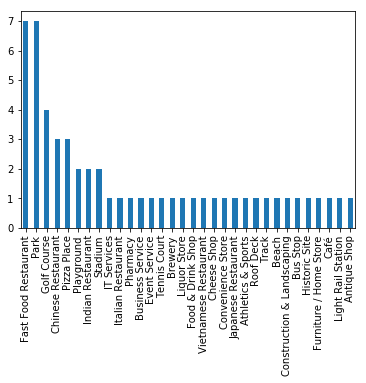

In [176]:
cl1_ven1.plot(kind='bar')

In [178]:
cl1_ven2 = cluster1['2nd Most Common Venue'].value_counts()
cl1_ven2.head()

Park                 4
Café                 4
Fish & Chips Shop    3
Yoga Studio          2
Lake                 2
Name: 2nd Most Common Venue, dtype: int64

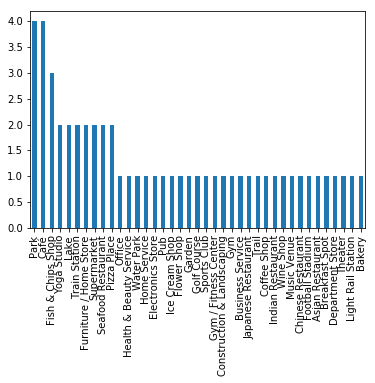

In [179]:
cl1_ven2.plot(kind='bar')

In [98]:
cluster1['Sector'].describe()

count                 54
unique                 2
top       Non-government
freq                  40
Name: Sector, dtype: object

In [180]:
cl1_sc = cluster1[['State Overall Score']].describe()
cl1_sc

,State Overall Score
count,54.000000
mean,94.592593
std,2.917213
min,90.000000
25%,92.000000
50%,94.000000
75%,97.000000
max,100.000000


In [182]:
# Score of the Government Schools in Cluster 1. 
cl1_sc['Gov Sector'] = cluster1.loc[cluster1.Sector == 'Government', cluster1.columns[1]].describe().to_frame()
cl1_sc

,State Overall Score,Gov Sector
count,54.000000,14.000000
mean,94.592593,93.785714
std,2.917213,2.913591
min,90.000000,90.000000
25%,92.000000,91.250000
50%,94.000000,93.000000
75%,97.000000,95.750000
max,100.000000,100.000000


In [183]:
# Score of the Non-Government Schools in Cluster 1. 
cl1_sc['Non-Gov Sector'] = cluster1.loc[cluster1.Sector == 'Non-government', cluster1.columns[1]].describe()
cl1_sc

,State Overall Score,Gov Sector,Non-Gov Sector
count,54.000000,14.000000,40.000000
mean,94.592593,93.785714,94.875000
std,2.917213,2.913591,2.901702
min,90.000000,90.000000,90.000000
25%,92.000000,91.250000,92.000000
50%,94.000000,93.000000,95.000000
75%,97.000000,95.750000,97.250000
max,100.000000,100.000000,99.000000


It is appreciated a better performance of the Non-government schools in terms of the Overall Score. 
      Gov    Non-gov
Mean  93.36  95.1

For the government sector 75% percent of the schools are above 91.25 of the state overall score, while the non-government ones are above 92 in the overall score.

In [202]:
cluster1['Total Enrolments'].describe()

count      54.000000
mean     1243.370370
std       732.070192
min       180.000000
25%       741.250000
50%       981.500000
75%      1611.500000
max      3927.000000
Name: Total Enrolments, dtype: float64

In [203]:
# Total Enrolments of the Non-Government Schools in Cluster 1. 
cluster1.loc[cluster1.Sector == 'Non-government', cluster1.columns[2]].describe()

count      40.000000
mean     1132.625000
std       701.298162
min       180.000000
25%       684.500000
50%       915.000000
75%      1414.000000
max      3927.000000
Name: Total Enrolments, dtype: float64

In [204]:
# Total Enrolments of the Non-Government Schools in Cluster 1. 
total_nongov = cluster1.loc[cluster1.Sector == 'Non-government', cluster1.columns[2]].sum()
total_nongov

45305

In [205]:
# Total Enrolments of the Government Schools in Cluster 1. 
cluster1.loc[cluster1.Sector == 'Government', cluster1.columns[2]].describe()

count      14.000000
mean     1559.785714
std       750.944552
min       508.000000
25%       964.250000
50%      1540.500000
75%      1873.500000
max      3445.000000
Name: Total Enrolments, dtype: float64

In [206]:
# Total Enrolments of the Government Schools in Cluster 1. 
total_gov = cluster1.loc[cluster1.Sector == 'Government', cluster1.columns[2]].sum()
total_gov

21837

In [207]:
#Percentage of the students from the goverment sector

In [208]:
print('Percentage of the Government Schools in cluster 1:%8.2f' % (100*total_gov/(total_gov+total_nongov)))

Percentage of the Government Schools in cluster 1:   32.52


In [209]:
print('Percentage of the Non-government Schools in cluster 1:%8.2f' % (100*total_nongov/(total_gov+total_nongov)))

Percentage of the Non-government Schools in cluster 1:   67.48


In [210]:
print('Total number of students in cluster 1 is {}'.format((total_gov+total_nongov)))

Total number of students in cluster 1 is 67142


In the government schools is observed more density in the enrolments with a mean of 1647.64 compare with 1070 of the non-government ones. The percentile are also showing more crowed schools in the public sector, where at least the half of the schools have around 1593.5 students compare with only 842 from non-government peers. From the total enrolment of the cluster 1, non-goverment institutions have almost 65% of the sample compare with the 35 % of the governement's schools. 


Cluster 2

In [214]:
schl_merged.loc[schl_merged['Cluster Labels'] == 2, schl_merged.columns[[1] + list(range(5, schl_merged.shape[1]))]]

,Postcode,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


Cluster 3

In [215]:
schl_merged.loc[schl_merged['Cluster Labels'] == 1, schl_merged.columns[[1] + list(range(2, schl_merged.shape[1]))]]

,Postcode,State Overall Score,Total Enrolments,Sector,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3004,100,954,Government,-37.836729,144.971831,1,Café,Australian Restaurant,Pub,Hotel,Japanese Restaurant,Light Rail Station,Convenience Store,Coffee Shop,Bar,Grocery Store
1,3141,100,1357,Government,-37.835388,144.995677,1,Café,Italian Restaurant,Dessert Shop,Japanese Restaurant,Coffee Shop,Hotel,Bakery,Pub,Multiplex,Thai Restaurant
2,3806,100,832,Government,-38.039219,145.336030,1,Café,Tennis Court,Swim School,Dog Run,Yoga Studio,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop
4,3125,100,1407,Non-government,-37.848946,145.107125,1,Café,Gas Station,Gym,Sandwich Place,Supermarket,Chinese Restaurant,Park,Pizza Place,Coffee Shop,Yoga Studio
5,3103,100,450,Non-government,-37.814764,145.080433,1,Café,Bakery,Sandwich Place,Italian Restaurant,Liquor Store,Thai Restaurant,Park,Movie Theater,Malay Restaurant,Pet Store
8,3146,99,670,Non-government,-37.860997,145.054004,1,Park,Café,Light Rail Station,Vietnamese Restaurant,Sporting Goods Shop,Thai Restaurant,Bakery,Malay Restaurant,Train Station,Tram Station
9,3126,99,1296,Non-government,-37.816624,145.066725,1,Café,Light Rail Station,Convenience Store,Park,Movie Theater,Train,Business Service,Seafood Restaurant,Gym,Music Store
10,3187,99,1442,Non-government,-37.928525,145.007440,1,Café,Indian Restaurant,Sandwich Place,Golf Course,Thai Restaurant,Park,Grocery Store,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant
11,3004,99,1799,Non-government,-37.833490,144.975897,1,Café,Park,Hotel,Australian Restaurant,Japanese Restaurant,Convenience Store,Asian Restaurant,Thai Restaurant,Nightclub,Pizza Place
12,3126,99,721,Non-government,-37.818553,145.060217,1,Café,Convenience Store,Bar,Burger Joint,Afghan Restaurant,Greek Restaurant,Bakery,Dumpling Restaurant,Thai Restaurant,Train Station


In [216]:
cluster3 = schl_merged.loc[schl_merged['Cluster Labels'] == 1, schl_merged.columns[[1] + list(range(2, schl_merged.shape[1]))]]

In [217]:
cluster3['1st Most Common Venue'].value_counts()

Café                    65
Fast Food Restaurant     2
Shopping Mall            1
Convenience Store        1
Park                     1
Train Station            1
Dog Run                  1
Pizza Place              1
Fish & Chips Shop        1
Soccer Field             1
Name: 1st Most Common Venue, dtype: int64

In [218]:
cluster3['2nd Most Common Venue'].value_counts().head(10)

Café                  7
Park                  6
Convenience Store     6
Italian Restaurant    5
Light Rail Station    5
Greek Restaurant      4
Bar                   3
Pub                   3
Pizza Place           3
Indian Restaurant     3
Name: 2nd Most Common Venue, dtype: int64

In [219]:
cluster3['Sector'].describe()

count                 75
unique                 2
top       Non-government
freq                  52
Name: Sector, dtype: object

In [220]:
cluster3['State Overall Score'].describe()

count     75.000000
mean      95.533333
std        2.933190
min       90.000000
25%       93.000000
50%       96.000000
75%       98.000000
max      100.000000
Name: State Overall Score, dtype: float64

In [221]:
# Score of the Government Schools in Cluster 3. 
cluster3.loc[cluster3.Sector == 'Government', cluster3.columns[1]].describe()

count     23.000000
mean      94.869565
std        3.049655
min       90.000000
25%       92.000000
50%       94.000000
75%       97.500000
max      100.000000
Name: State Overall Score, dtype: float64

In [222]:
# Score of the Non-Government Schools in Cluster 3. 
cluster3.loc[cluster3.Sector == 'Non-government', cluster3.columns[1]].describe()

count     52.000000
mean      95.826923
std        2.860969
min       90.000000
25%       93.750000
50%       96.000000
75%       98.000000
max      100.000000
Name: State Overall Score, dtype: float64

## Summary of the State Overall Score in both Clusters

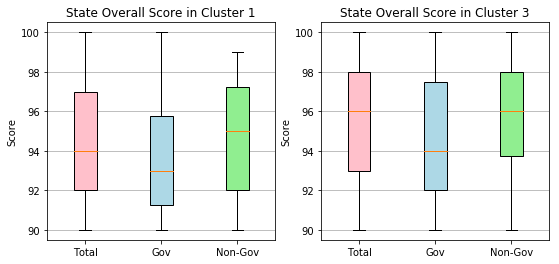

In [228]:
import matplotlib.pyplot as plt
import numpy as np

d0 = cluster1['State Overall Score']
d1 = cluster1.loc[cluster1.Sector == 'Government', cluster1.columns[1]]
d2 = cluster1.loc[cluster1.Sector == 'Non-government', cluster1.columns[1]]
cl1_data = [d0,d1,d2]

c0 = cluster3['State Overall Score']
c1 = cluster3.loc[cluster3.Sector == 'Government', cluster3.columns[1]]
c2 = cluster3.loc[cluster3.Sector == 'Non-government', cluster3.columns[1]]
cl3_data = [c0,c1,c2]

labels = ['Total','Gov','Non-Gov']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(cl1_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('State Overall Score in Cluster 1')

# notch shape box plot
bplot2 = axes[1].boxplot(cl3_data,
                         #notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('State Overall Score in Cluster 3')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    #ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Score')

plt.show()

It is appreciated a better performance of the Non-government schools in terms of the Overall Score. 
      Gov    Non-gov
Mean  94.9  95.76

For the government sector 75% percent of the schools are above 92.25 of the state overall score, while the non-government ones are above 94 in the overall score. 

In [68]:
cluster3['Total Enrolments'].describe()

count      72.000000
mean     1156.944444
std       576.190596
min       154.000000
25%       743.000000
50%      1141.000000
75%      1398.000000
max      3114.000000
Name: Total Enrolments, dtype: float64

In [123]:
# Total Enrolments of the Non-Government Schools in Cluster 3. 
cluster3.loc[cluster3.Sector == 'Non-government', cluster3.columns[2]].describe()

count      50.000000
mean     1137.820000
std       638.977426
min       154.000000
25%       721.250000
50%       964.500000
75%      1370.250000
max      3114.000000
Name: Total Enrolments, dtype: float64

In [233]:
# Total Enrolments of the Government Schools in Cluster 3. 
cluster3.loc[cluster3.Sector == 'Government', cluster3.columns[2]].describe()

count      23.000000
mean     1239.565217
std       442.400253
min       406.000000
25%       973.500000
50%      1261.000000
75%      1451.000000
max      2183.000000
Name: Total Enrolments, dtype: float64

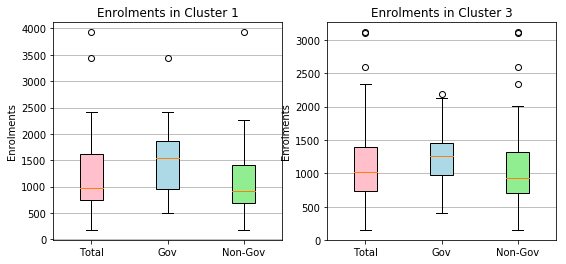

In [234]:
import matplotlib.pyplot as plt
import numpy as np

f0 = cluster1['Total Enrolments']
f1 = cluster1.loc[cluster1.Sector == 'Government', cluster1.columns[2]]
f2 = cluster1.loc[cluster1.Sector == 'Non-government', cluster1.columns[2]]
en1_data = [f0,f1,f2]

g0 = cluster3['Total Enrolments']
g1 = cluster3.loc[cluster3.Sector == 'Government', cluster3.columns[2]]
g2 = cluster3.loc[cluster3.Sector == 'Non-government', cluster3.columns[2]]
en3_data = [g0,g1,g2]

labels = ['Total','Gov','Non-Gov']

fig, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot3 = axes1[0].boxplot(en1_data,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes1[0].set_title('Enrolments in Cluster 1')

# notch shape box plot
bplot4 = axes1[1].boxplot(en3_data,
                         #notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes1[1].set_title('Enrolments in Cluster 3')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot3, bplot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes1:
    ax.yaxis.grid(True)
    #ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Enrolments')

plt.show()

In [136]:
# Total Enrolments of the Government Schools in Cluster 3. 
total_gov3 = cluster3.loc[cluster3.Sector == 'Government', cluster3.columns[2]].sum()
total_gov3

26409

In [137]:
# Total Enrolments of the Non-Government Schools in Cluster 3. 
total_nongov3 = cluster3.loc[cluster3.Sector == 'Non-government', cluster3.columns[2]].sum()
total_nongov3

56891

In [138]:
print('Percentage of the Government Schools in cluster 3:%8.2f' % (100*total_gov3/(total_gov3+total_nongov3)))

Percentage of the Government Schools in cluster 3:   31.70


In [139]:
print('Percentage of the Non-Government Schools in cluster 3:%8.2f' % (100*total_nongov3/(total_gov3+total_nongov3)))

Percentage of the Non-Government Schools in cluster 3:   68.30


In the government schools is observed almost same density in the enrolments with a mean of 1200.409 compare with 1137.82 of the non-government ones. The percentile are also showing more crowed schools in the public sector, where at least the half of the schools have around 1242.5 students compare with only 964.5 from non-government peers. From the total enrolment of the cluster 3, non-goverment institutions have almost 68.3% of the sample compare with the 31.7% of the governement's schools. 

The schools in this cluster are more dense geographically with 68.3% of top schools. 


In [141]:
print('Total number of students in cluster 3 is {}'.format((total_gov3+total_nongov3)))

Total number of students in cluster 3 is 83300


Cluster 4

In [47]:
schl_merged.loc[schl_merged['Cluster Labels'] == 3, schl_merged.columns[[1] + list(range(5, schl_merged.shape[1]))]]

,Postcode,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
99,3911,-38.192779,145.175103,3,Liquor Store,Gift Shop,Zoo,Flower Shop,Field,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Food & Drink Shop


Cluster 5

In [57]:
schl_merged.loc[schl_merged['Cluster Labels'] == 4, schl_merged.columns[[1] + list(range(5, schl_merged.shape[1]))]]

,Postcode,Lat,Lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


### Observation form the Map and the cluster most common Venue

The cluster 2 gather most of the suburbs in Toronto,that represents the ammenities in common for most of the Neighborhoods across the entire Toronto Metro area. 
The Cluster 3 seems to be scatter across the second tier of the city just behind the cbd toward the northeast in between two main roads or train lines from west to east. 
Clusters 1, 4 and 5 are just one Neighborhood per cluster. 

